In [1]:
# READ FROM CSV AND CREATE A DATA FRAME

import pandas as pd

df = pd.read_csv('./parkinsons.csv')
# print(df)
# df = df.sample(frac=1).reset_index(drop=True)
display(df)

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [2]:
df.isnull().sum()

mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
status                    0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
dtype: int64

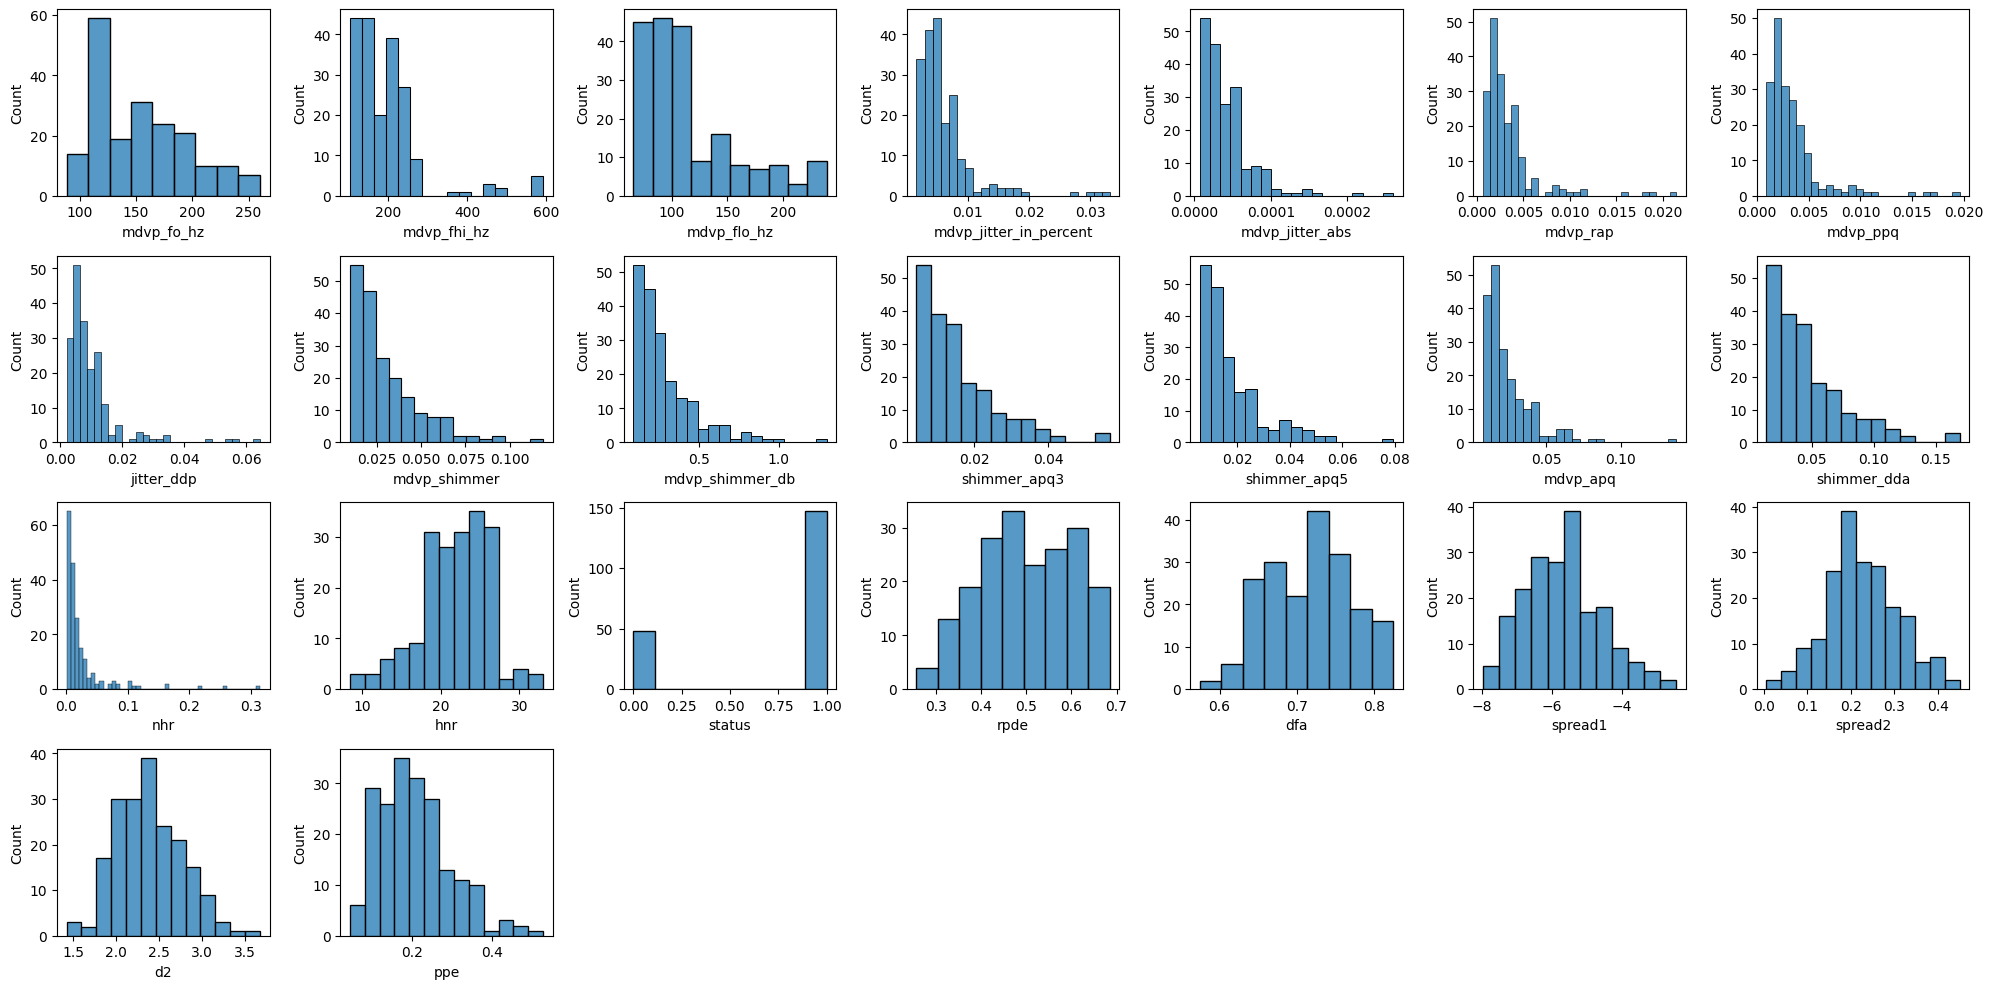

In [3]:
# checking numerical features distribution

import matplotlib.pyplot as plt
import seaborn as sns

def plotCols(dataframe):
    totalPlots = len(dataframe.columns)
    plotColumns = totalPlots//7+1
    plt.figure(figsize = (20, plotColumns*2.5))
    plotnumber = 1
    for column in dataframe.columns:
        if plotnumber <= totalPlots:
            ax = plt.subplot(plotColumns, 7, plotnumber)
            # sns.distplot(dataframe[column])
            sns.histplot(dataframe[column])
            plt.xlabel(column)
            
        plotnumber += 1

    plt.tight_layout()
    plt.show()

plotCols(df)

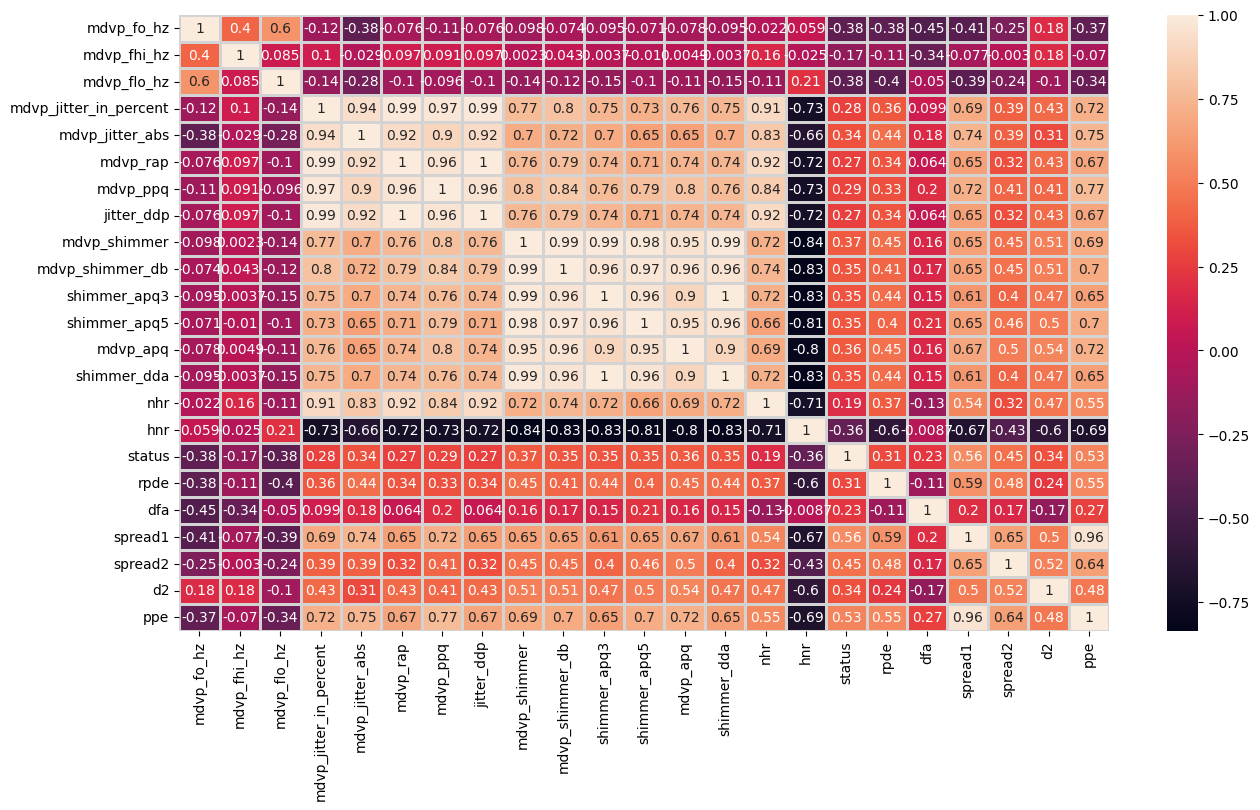

In [4]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 1, linecolor = 'lightgrey')
plt.show()

In [5]:
df.columns

Index(['mdvp_fo_hz', 'mdvp_fhi_hz', 'mdvp_flo_hz', 'mdvp_jitter_in_percent',
       'mdvp_jitter_abs', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp', 'mdvp_shimmer',
       'mdvp_shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'mdvp_apq',
       'shimmer_dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa', 'spread1',
       'spread2', 'd2', 'ppe'],
      dtype='object')

In [6]:
# Remove the highly correlated columns
# df = df.drop(columns=['mdvp_jitter_abs', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp'])
# df = df.drop(columns=['mdvp_shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'mdvp_apq', 'shimmer_dda'])

# df = df.drop(columns=['mdvp_ppq', 'jitter_ddp'])
# df = df.drop(columns=['mdvp_shimmer_db', 'shimmer_apq5', 'shimmer_dda'])

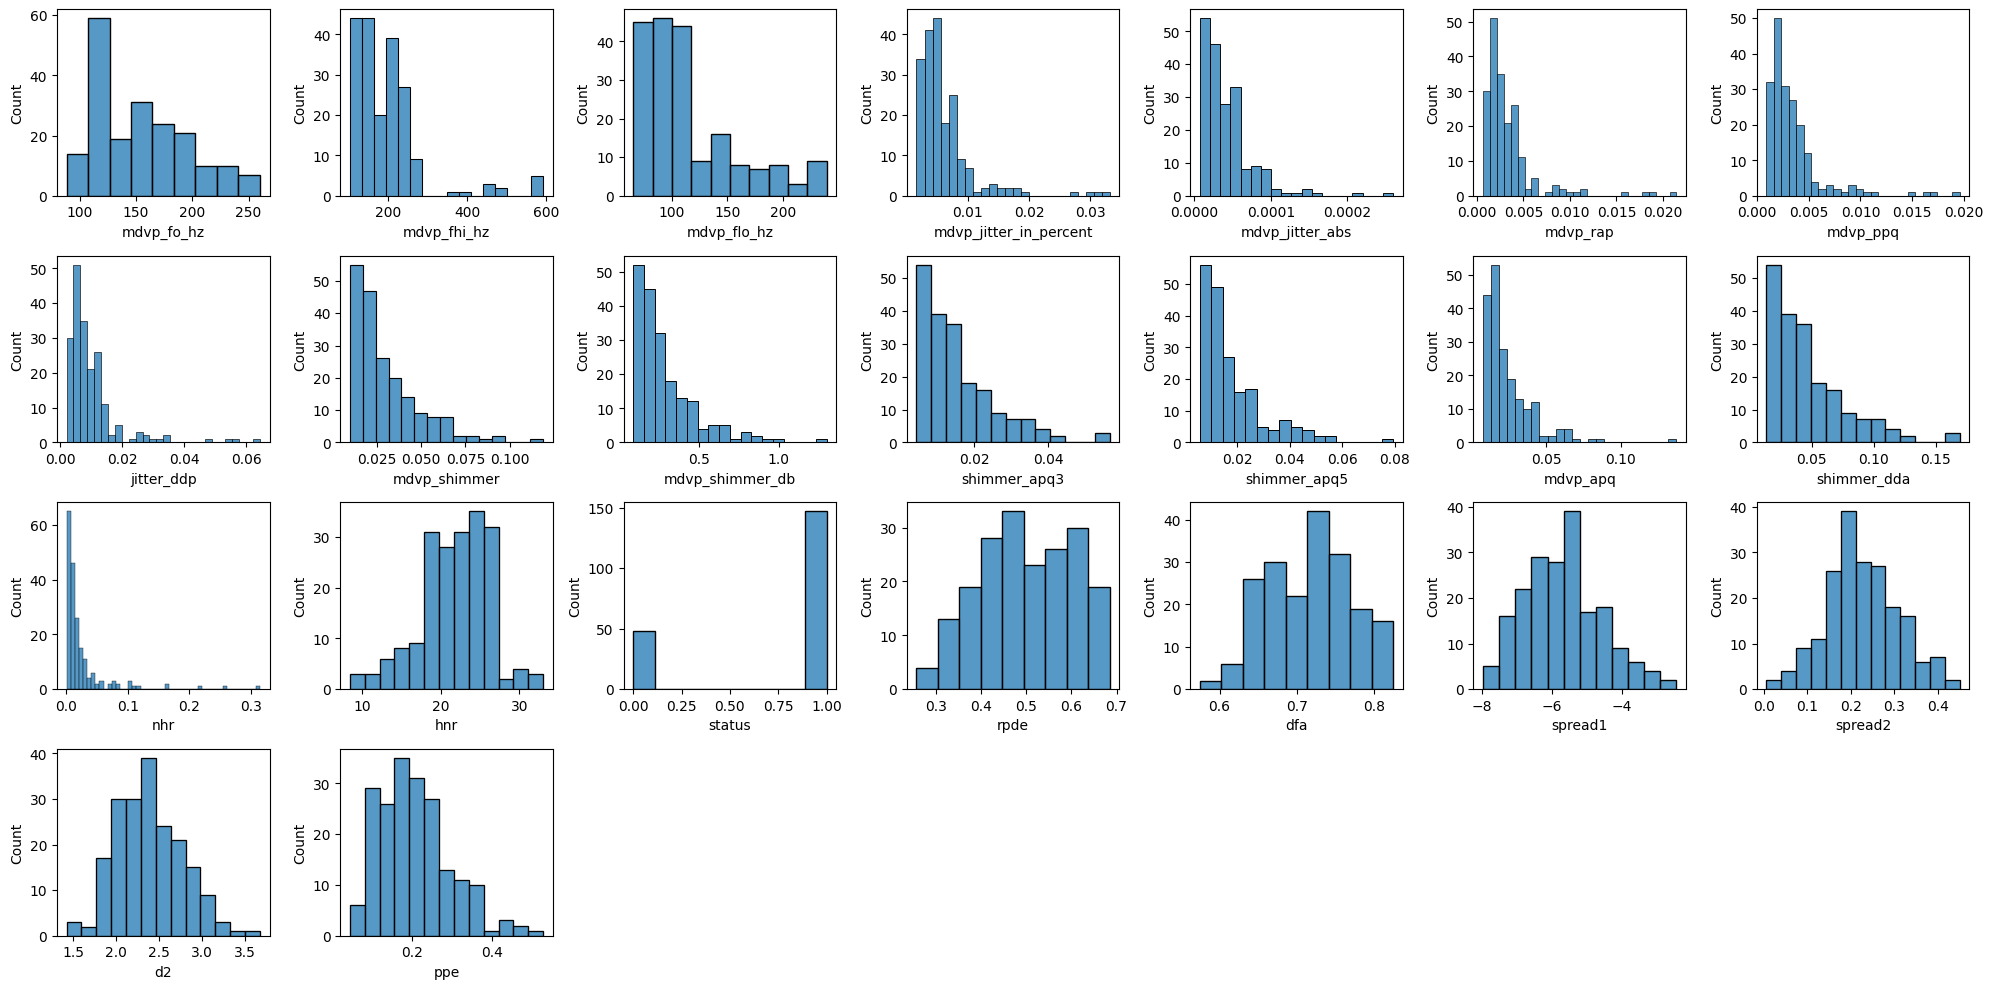

In [7]:
plotCols(df)

In [8]:
df.head()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
ind_col = [col for col in df.columns if col != 'status']
dep_col = 'status'

x = df[ind_col]
y = df[dep_col]

In [10]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=10, n_jobs=-1)
x, y = oversample.fit_resample(x, y)

c:\Users\goura\anaconda3\envs\tf\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=15, n_jobs=-1)
# x_train, y_train = oversample.fit_resample(x_train, y_train)

In [13]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

grid_param = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 10, 12, 15, 20],
    'min_samples_split' : [2, 3, 5, 7],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'max_features' : ['sqrt', 'log2']
}

grid_search_dt = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1, verbose = 3)
grid_search_dt.fit(x_train, y_train)



# best parameters and best score
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)
print(grid_search_dt.best_estimator_)

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
{'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.9234042553191489
DecisionTreeClassifier(criterion='log_loss', max_depth=20, max_features='sqrt',
                       min_samples_split=3)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# dt = DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_split=7)
dt = grid_search_dt.best_estimator_
dt.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dt_acc = accuracy_score(y_test, dt.predict(x_test))

print(f"Training Accuracy of Decision Tree is {accuracy_score(y_train, dt.predict(x_train))}")
print(f"Test Accuracy of Decision Tree is {dt_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dt.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dt.predict(x_test))}")

Training Accuracy of Decision Tree is 0.9957446808510638
Test Accuracy of Decision Tree is 0.9491525423728814 

Confusion Matrix :- 
[[29  1]
 [ 2 27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.96      0.93      0.95        29

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



In [15]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# dt_acc = accuracy_score(y_test, dt.predict(x_test))

# print(f"Training Accuracy of Decision Tree is {accuracy_score(y_train, dt.predict(x_train))}")
# print(f"Testing Accuracy of Decision Tree is {dt_acc} \n")

# print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dt.predict(x_test))}\n")
# print(f"Classification Report :- \n {classification_report(y_test, dt.predict(x_test))}")

In [16]:
# hyper parameter tuning of random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(x_train, y_train)


from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_estimators' : [100, 120, 150, 200, 250],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [7, 10, 13, 15],
    'class_weight': ['balanced', 
                     'balanced_subsample'
                     ],
    # 'min_samples_leaf' : [1, 3, 5, 7],
    # 'min_samples_split' : [2, 3, 5, 7],
    'max_features' : ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(rf, grid_param, cv = 5, n_jobs = -1, verbose = 3)
grid_search_rf.fit(x_train, y_train)



# best parameters and best score
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)
print(grid_search_rf.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}
0.9276595744680851
RandomForestClassifier(class_weight='balanced', max_depth=7,
                       max_features='log2')


In [17]:
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=7)
# dt.fit(x_train, y_train)
# dt_acc = accuracy_score(y_test, dt.predict(x_test))
# print(dt_acc)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=10)
# rf = RandomForestClassifier(class_weight='balanced_subsample', criterion='gini', max_depth=15, max_features='log2', n_estimators=100,
#                             min_samples_leaf=1, min_samples_split=2)
# rf = grid_search_rf.best_estimator_
rf.fit(x_train, y_train)
# accuracy score, confusion matrix and classification report of RANDOM FOREST

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Test Accuracy of Random Forest Classifier is {accuracy_score(y_test, rf.predict(x_test))} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rf.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rf.predict(x_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9830508474576272 

Confusion Matrix :- 
[[30  0]
 [ 1 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [19]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_val_score(dt, x, y, cv=kf)

print(f'Cross-Validation Results (Accuracy) DT: {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy) DT: [0.93220339 0.79661017 0.84745763 0.81355932 0.89655172]
Mean Accuracy: 0.8572764465225013


In [20]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_val_score(rf, x, y, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [1.         0.86440678 0.93220339 1.         0.89655172]
Mean Accuracy: 0.9386323787258913


In [21]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

def error_report(model):
    mse = mean_squared_error(y_test, model.predict(x_test))
    print(f"Mean Squared Error: {mse}")
    rmse = root_mean_squared_error(y_test, model.predict(x_test))
    print(f"Root Mean Squared Error: {rmse}")
    mae = mean_absolute_error(y_test, model.predict(x_test))
    print(f"Mean Absolute Error: {mae}")

error_report(dt)
print()
error_report(rf)

Mean Squared Error: 0.05084745762711865
Root Mean Squared Error: 0.22549380840084865
Mean Absolute Error: 0.05084745762711865

Mean Squared Error: 0.01694915254237288
Root Mean Squared Error: 0.13018891098082386
Mean Absolute Error: 0.01694915254237288


In [22]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./parkinsons-dt.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(dt, file)

In [23]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./parkinsons-rf.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)